In [2]:
import pandas as pd
import DataLoading
import torch
import matplotlib.pyplot as plt
import NN_evaluation
import numpy as np 
import random

In [8]:
sc = "sc01"
period = "2030"
case= "9n"
folder = f"../Data/{case}_DC_fy/"

all_executions = DataLoading.list_executions(folder=folder,per = period,sc=sc)
te_s = 0.3
val_s = 0.3
dfs_in, dfs_out, dfs_inter = DataLoading.load_data_ext_out(folder, all_executions, period, sc, ["PowerFlow"],"SystemCosts")
dfs_inter_j = DataLoading.join_frames_inter_layer(dfs_inter,all_executions)
dfs_inter_j = DataLoading.trim_columns_to_common(dfs_inter_j)
# Convert to pytorch tensors
ts_in, ts_out, ts_inter = DataLoading.split_tr_val_te_ext_out(dfs_in, dfs_out, dfs_inter_j, all_executions, te_s, val_s)
d_ft_in, d_ft_out, d_ft_inter,maxs = DataLoading.concat_and_normalize_ext_out(ts_in, ts_out, ts_inter, all_executions)

input_size = dfs_in["Network_Existing_Generation_Full"].shape[1]
inter_size = dfs_inter_j["Network_Existing_Generation_Full"].shape[1]

t_in_fy, t_out_fy, t_inter_fy, maxs = DataLoading.concat_all_exec_fy(dfs_in=dfs_in, dfs_out=dfs_out, dfs_inter_j=dfs_inter_j,executions=all_executions,normalize_out=True)


input_f_sc01_Network_Existing_Generation_Full_2030.csv
51
input_f_sc01_Network_Full_Generation_Full_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_1_Node_6_cac1_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_1_Node_6_cac2_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_1_Node_6_cac3_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac1_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac2_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac3_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_2_Node_6_cac1_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_2_Node_6_cac2_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_2_Node_6_cac3_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_3_Node_4_cac1_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_3_Node_4_cac2_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_3_Node_4_cac3_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_3_Node_6_cac1_2030.csv
51
input_f_sc01_PINT_Network_Line_In_Node_3_No

In [27]:
hyperloop_name = "Decay_2016h_rand_Weeks_RTS24_DC_0.25_v0.33_PF_0_80"
hyperloop_name = f"Decay_rand_Weeks_{case}_DC_0.25_v0.33_PF_0_74"

hour_limit = 2016

df_losses = pd.read_csv(f"Loss_results_csv/{hyperloop_name}.csv",index_col=0)
#df_losses = pd.read_csv(f"Loss_results_csv/{hyperloop_name}.csv",index_col=0)
f = df_losses["Nb_hours_used"] <=hour_limit

loss_to_sort = "Te_l_mse"

[102, 153, 31, 12, 6]
OE_2016hours_(3, 1)h_128e_(0.0025, 32, 0.25)lr_0dor_Falsero_128bs_0ill_FalseMAE min_val
trained_models/Decay_rand_Weeks_9n_DC_0.25_v0.33_PF_0_74/min_val/model_OE_2016hours_(3, 1)h_128e_(0.0025, 32, 0.25)lr_0dor_Falsero_128bs_0ill_FalseMAE.pth


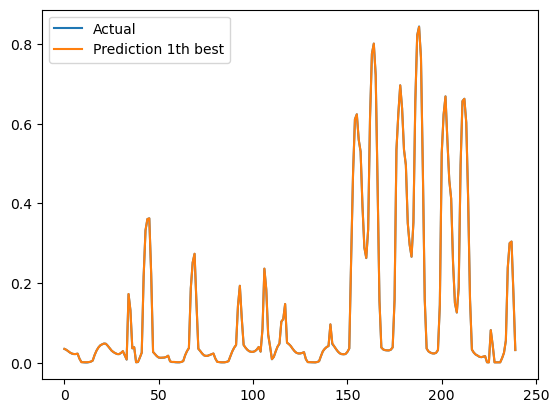

In [39]:
#Visualisation of multiple models in input order
ex = all_executions[25]


#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])
ex_in = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in_scalar"])
ex_out = dfs_out[ex].sum(axis=1).to_numpy()/maxs["out_scalar"]


s = 24*0
e=s+24*10
plt.plot(ex_out[s:e],label = "Actual")

for xth_best in [1]: 
    row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
    m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=False)
    prediction = m(ex_in.float())[0].detach().numpy()
    plt.plot(prediction[s:e],label = f"Prediction {xth_best}th best")
plt.legend()

[102, 153, 31, 12, 6]
OE_2016hours_(3, 1)h_128e_(0.0025, 32, 0.25)lr_0dor_Falsero_128bs_0ill_FalseMAE min_val
trained_models/Decay_rand_Weeks_9n_DC_0.25_v0.33_PF_0_74/min_val/model_OE_2016hours_(3, 1)h_128e_(0.0025, 32, 0.25)lr_0dor_Falsero_128bs_0ill_FalseMAE.pth
[102, 153, 31, 12, 6]
OE_2016hours_(3, 1)h_128e_(0.0025, 32, 0.25)lr_0dor_Falsero_128bs_0ill_FalseMAE min_val
trained_models/Decay_rand_Weeks_9n_DC_0.25_v0.33_PF_0_74/min_val/model_OE_2016hours_(3, 1)h_128e_(0.0025, 32, 0.25)lr_0dor_Falsero_128bs_0ill_FalseMAE.pth


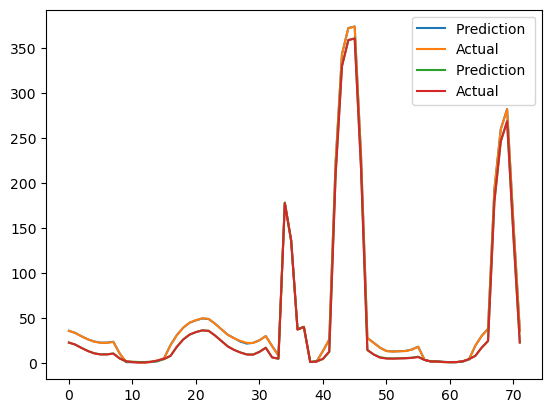

In [45]:
#Visualisation of multiple executions in input order
ex = all_executions[0]


#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])

j = 2

s = 0
e=s+72


for ex_i in [0,2]:
    ex = all_executions[ex_i]
    row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
    m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=False)
    
    ex_in = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in_scalar"])
    ex_out = dfs_out[ex].sum(axis=1).to_numpy()
    prediction = m(ex_in.float())[0].detach().numpy()* maxs["out_scalar"].numpy()
    
    plt.plot(prediction[s:e],label = f"Prediction ")
    plt.plot(ex_out[s:e],label = f"Actual")

plt.legend()

Text(0.5, 1.0, 'Derived line benefits')

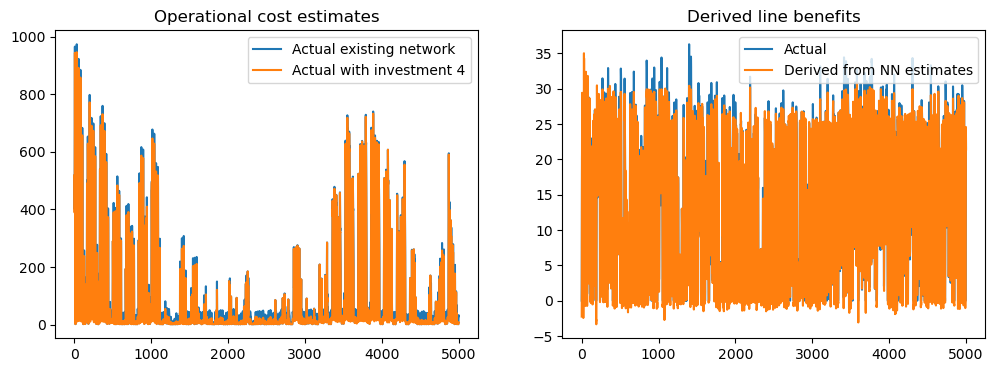

In [56]:
#Visualisation of multiple executions in input order
# f = df_losses.alpha ==0.0
# loss_to_sort = "Te_l_t_mse"
# xth_best = 1
# row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
# m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=cluster_run)

#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])

l_idx = 4
ex = all_executions[l_idx]
negf = all_executions[0]


ex_in_e = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in_scalar"])
ex_in_negf = torch.nan_to_num(dfs_in[negf].to_numpy()/maxs["in_scalar"])

prediction_e = m(ex_in_e.float())[0].detach().numpy() * maxs["out_scalar"].numpy()
prediction_negf = m(ex_in_negf.float())[0].detach().numpy() * maxs["out_scalar"].numpy()

actual_e = NN_evaluation.get_actual_from_dfs_out(ex,dfs_out)
actual_negf = NN_evaluation.get_actual_from_dfs_out(negf,dfs_out)

lb_est = prediction_negf- prediction_e
lb_actual = NN_evaluation.calculate_lb_from_dfs_out(dfs_out,ex)



#s= random.randint(0,len(actual_e))
s=950
e = s+5000

fig, axs = plt.subplots(1,2,figsize = (12,4))

axs[0].plot(actual_negf[s:e],label = "Actual existing network")
#axs[0].plot(prediction_e[s:e],label = "NN Estimate existing network")
axs[0].plot(actual_e[s:e],label = f"Actual with investment {l_idx}")
#axs[0].plot(prediction_negf[s:e],label = f"NN Estimate with investment {l_idx} ")

axs[0].legend()
axs[0].set_title("Operational cost estimates")


axs[1].plot(lb_actual[s:e],label = "Actual")
axs[1].plot(lb_est[s:e],label = "Derived from NN estimates")

axs[1].legend()
axs[1].set_title(f"Derived line benefits")

#axs[2].hist(lb_actual/actual_negf,bins= 100)



In [33]:
sum(actual_negf)

312.12915148108857